# Importando Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('DelayedFlights.zip')
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Mostrar todas as colunas

In [5]:
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


O que representa cada coluna:

**Year:** O ano da data do voo.

**Month:** O mês da data do voo.

**DayofMonth:** O dia do mês da data do voo.

**DayOfWeek:** O dia da semana da data do voo (1 para segunda-feira, 2 para terça-feira, e assim por diante).

**DepTime:** A hora de partida real do voo (formato HHMM).

**CRSDepTime:** A hora de partida programada do voo (formato HHMM).

**ArrTime:** A hora de chegada real do voo (formato HHMM).

**CRSArrTime:** A hora de chegada programada do voo (formato HHMM).

**UniqueCarrier:** O código do transportador aéreo.

**FlightNum:** O número do voo.

**TailNum:** O número de cauda da aeronave.

**ActualElapsedTime:** O tempo real de voo em minutos.

**CRSElapsedTime:** O tempo de voo programado em minutos.

**AirTime:** O tempo real no ar em minutos.

**ArrDelay:** O atraso na chegada em minutos.

**DepDelay:** O atraso na partida em minutos.

**Origin:** O aeroporto de origem do voo.

**Dest:** O aeroporto de destino do voo.

**Distance:** A distância percorrida em milhas.

**TaxiIn:** O tempo de táxi na chegada em minutos.

**TaxiOut:** O tempo de táxi na partida em minutos.

**Cancelled:** Indica se o voo foi cancelado (1 para sim, 0 para não).

**CancellationCode:** O código de cancelamento, se o voo foi cancelado. Sendo A = transportadora, B = clima, C = NAS(National Airspace System), D = segurança

**Diverted:** Indica se o voo foi desviado (1 para sim, 0 para não).

**CarrierDelay:** O tempo de atraso atribuído à companhia aérea em minutos.

**WeatherDelay:** O tempo de atraso atribuído ao clima em minutos.

**NASDelay:** O tempo de atraso atribuído ao Sistema Nacional de Aviação em minutos.

**SecurityDelay:** O tempo de atraso atribuído à segurança em minutos.

**LateAircraftDelay:** O tempo de atraso atribuído à aeronave em minutos.


In [6]:
df.shape

(1936758, 30)

In [7]:
df.nunique()

Unnamed: 0           1936758
Year                       1
Month                     12
DayofMonth                31
DayOfWeek                  7
DepTime                 1438
CRSDepTime              1207
ArrTime                 1440
CRSArrTime              1364
UniqueCarrier             20
FlightNum               7499
TailNum                 5366
ActualElapsedTime        673
CRSElapsedTime           515
AirTime                  650
ArrDelay                1128
DepDelay                1058
Origin                   303
Dest                     304
Distance                1419
TaxiIn                   180
TaxiOut                  332
Cancelled                  2
CancellationCode           4
Diverted                   2
CarrierDelay             983
WeatherDelay             599
NASDelay                 574
SecurityDelay            156
LateAircraftDelay        564
dtype: int64

Verificar a quantidade de linhas com valores nulos

In [8]:
df.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    689270
SecurityDelay        689270
NASDelay             689270
WeatherDelay         689270
CarrierDelay         689270
ActualElapsedTime      8387
AirTime                8387
ArrDelay               8387
ArrTime                7110
TaxiIn                 7110
TaxiOut                 455
CRSElapsedTime          198
TailNum                   5
CRSArrTime                0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
Diverted                  0
CancellationCode          0
Cancelled                 0
Distance                  0
UniqueCarrier             0
Dest                      0
Origin                    0
DepDelay                  0
Year                      0
CRSDepTime                0
FlightNum                 0
Unnamed: 0                0
dtype: int64

Devido a presença de várias linhas nulas as colunas LateAircraftDelay, SecurityDelay,NASDelay, WeatherDelay, CarrierDelay, ActualElapsedTime, AirTime, ArrDelay, ArrTime, TaxiIn, TaxiOut, CRSElapsedTime devem ser tratadas.

In [11]:
df['LateAircraftDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['CarrierDelay'].fillna(0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [15]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000000,NaN,0.996163,0.055479,-0.000094,-0.009365,-0.012203,-0.000092,0.002347,-0.018826,0.025926,0.029418,0.021031,0.002571,0.006899,0.026011,0.033385,0.017770,0.028348,0.006663,-0.000907,0.003011,0.009983,-0.003449,-0.003761
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.996163,NaN,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001014,0.001367,-0.000188,0.002684,0.007046,0.000860,-0.000897,0.004769,0.005498,0.019705,0.002574,0.028837,0.006467,-0.004159,0.003512,0.004422,-0.002948,-0.002194
DayofMonth,0.055479,NaN,0.059651,1.000000,0.017476,0.001014,0.001019,0.000833,0.000758,-0.005912,-0.000880,-0.000028,-0.000244,0.004129,0.005289,0.000117,-0.002926,-0.002201,0.004671,0.001190,-0.001829,0.000293,0.003287,-0.000362,0.005435
DayOfWeek,-0.000094,NaN,0.000088,0.017476,1.000000,0.021924,0.027039,0.010913,0.017750,-0.009769,0.003072,0.004954,0.004738,0.006123,0.008538,0.008138,0.008516,-0.010302,0.000023,-0.001361,0.007105,0.004181,-0.005954,0.003653,0.005588
DepTime,-0.009365,NaN,-0.007809,0.001014,0.021924,1.000000,0.881598,0.458934,0.711513,-0.024786,-0.047040,-0.044619,-0.054831,0.127017,0.139254,-0.056003,-0.012023,0.030481,0.002280,-0.004632,-0.010085,0.016579,0.048442,-0.009159,0.169744
CRSDepTime,-0.012203,NaN,-0.011367,0.001019,0.027039,0.881598,1.000000,0.396724,0.710303,-0.054808,-0.034925,-0.026388,-0.036582,0.044447,0.058875,-0.029517,-0.032379,0.011408,0.000023,-0.009096,-0.066133,-0.000760,-0.008550,-0.011851,0.147540
ArrTime,-0.000092,NaN,0.001014,0.000833,0.010913,0.458934,0.396724,1.000000,0.619385,-0.013665,-0.013595,-0.012911,-0.017684,-0.050948,-0.053024,-0.027751,0.039818,0.001430,NaN,-0.007204,-0.065453,-0.023780,0.030989,-0.005919,-0.025115
CRSArrTime,0.002347,NaN,0.001367,0.000758,0.017750,0.711513,0.710303,0.619385,1.000000,-0.060006,0.033203,0.040117,0.025907,0.043078,0.053706,0.024335,0.013819,0.037942,0.000201,0.000907,-0.060757,0.001406,0.020631,-0.009240,0.116522
FlightNum,-0.018826,NaN,-0.000188,-0.005912,-0.009769,-0.024786,-0.054808,-0.013665,-0.060006,1.000000,-0.322283,-0.335956,-0.341250,0.061266,0.051852,-0.356770,-0.003918,0.015524,0.009147,-0.002885,0.060640,0.061871,0.028619,-0.000619,-0.019340


Text(0.5, 1.0, 'Correlação de spearman')

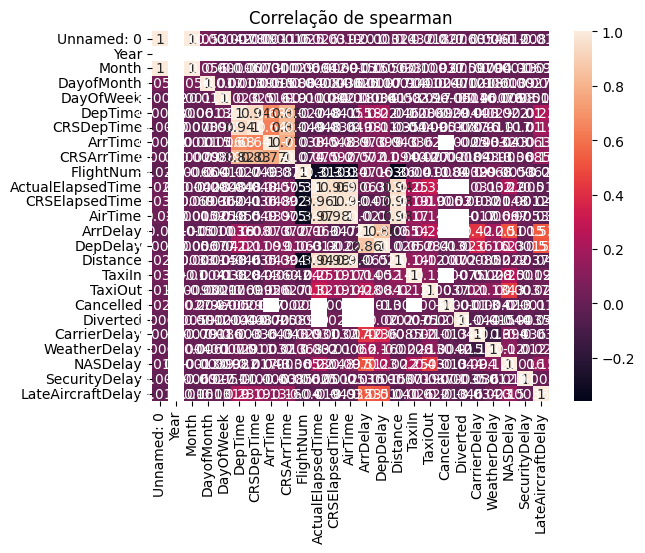

In [16]:
sns.heatmap(df_num.corr(method = "spearman"), annot=True)
plt.title("Correlação de spearman")